# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\filimon.hailemariam\Downloads\Web Scraping\Scripts
Changed working directory to: c:\Users\filimon.hailemariam\Downloads\Web Scraping


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [ ]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.326958
Total Ratings: 38778
Total Reviews: 8324

Awash: Awash Bank
App ID: com.sc.awashpay
Current Rating: 4.3236117
Total Ratings: 17768
Total Reviews: 3272

Amharabank: Amharabank
App ID: com.amharabank.Aba_mobile_banking
Current Rating: 4.4607844
Total Ratings: 748
Total Reviews: 185

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:06,  3.24s/it]


Scraping reviews for com.sc.awashpay...
Successfully scraped 400 reviews
Collected 400 reviews for Awash Bank


Banks:  67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]


Scraping reviews for com.amharabank.Aba_mobile_banking...
Successfully scraped 183 reviews
Collected 183 reviews for Amharabank


Banks: 100%|██████████| 3/3 [00:09<00:00,  3.24s/it]


Scraping Complete!

Total reviews collected: 983
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Awash Bank: 400
  Amharabank: 183

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: nice app......
Date: 2025-11-25 10:24:19

Rating: ⭐⭐⭐⭐⭐
Review: very good banking service and fast service...
Date: 2025-11-24 21:09:29

Rating: ⭐⭐⭐⭐⭐
Review: thanks blc this app help me to use all time...
Date: 2025-11-24 14:36:07

Awash Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: i hope to be good app...
Date: 2025-11-24 12:13:05

Rating: ⭐⭐⭐⭐⭐
Review: amazing 😍😍...
Date: 2025-11-23 19:17:07

Rating: ⭐⭐⭐⭐⭐
Review: excellent👍👍👍👍👍...
Date: 2025-11-21 22:10:42

Amharabank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-16 15:06:30

Rating: ⭐⭐⭐⭐⭐
Review: አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታ

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-25 10:24:19,Abdulfeta Mifta,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,7b5b3f8c-a0f4-4a15-973a-ff5971ad15fb,very good banking service and fast service,5,2025-11-24 21:09:29,Bewektu Bekele,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,3a75b79a-002f-4fc2-b6f0-dd8d187e8663,thanks blc this app help me to use all time,5,2025-11-24 14:36:07,Abdirizakmoalin Shiine,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,6518498e-441c-407d-b546-35a12a98645a,good,5,2025-11-24 11:54:09,Sancho Kume,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,f2f0cff2-6181-4a3a-926f-5b3491ca4cf8,why we can't send money to other people telebi...,1,2025-11-24 08:44:51,CodeCrafter,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [ ]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 983 reviews

[1/7] Checking for missing data...

Missing values:
  reply_content: 980 (99.69%)
  app_id: 211 (21.46%)

[2/7] Removing duplicates...
Removed 147 duplicate reviews

[3/7] Handling missing values...

[4/7] Normalizing dates...
Date range: 2023-06-18 to 2025-11-25

[5/7] Cleaning text...

[6/7] Validating ratings...
All ratings are valid (1-5)

[7/7] Preparing final output...
Final dataset: 836 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 983
Duplicates removed: 147
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 836

Data retention rate: 85.05%
Data error rate: 14.95%
⚠ Data quality: NEEDS ATTENTION (>10% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 336
  Awash Bank: 331
  Amharabank: 169

Rating distribution:
  ⭐⭐⭐⭐⭐: 561 (67.1%)
  ⭐⭐⭐⭐: 89 (10.6%)
  ⭐⭐⭐: 38 (4.5%)
  ⭐

## 3. Visualizations

Let's explore the cleaned data.

C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_21832\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_21832\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


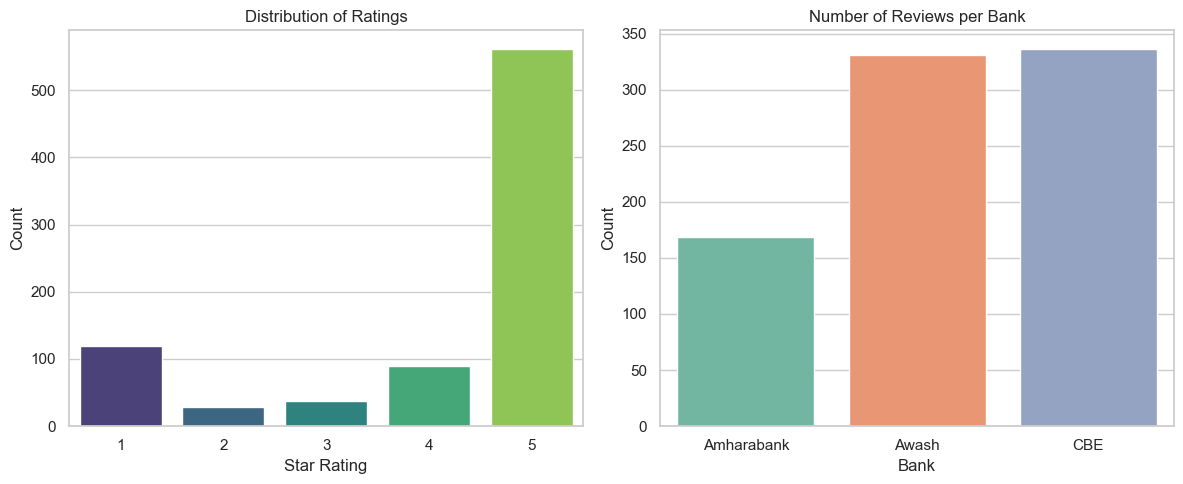

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

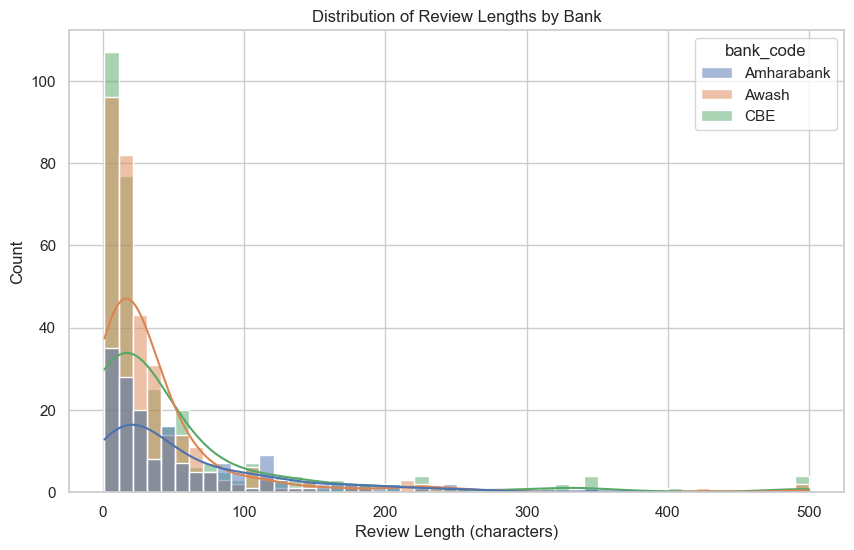

In [ ]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()